## Order pending time

This KPI measures the time between the time a order is receive to the time the order is processed and ready to be shipped.

In [16]:
# imports

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%store -r final_merge

df = final_merge.copy()
df.tail(10)

,order_id,order_date,state,region,ship_mode,ready_to_ship_date,pickup_date,arrival_scan_date
5000,US-2020-167570,2020-12-08,Pennsylvania,East,Standard Processing,NaT,2020-12-16,NaT
5001,US-2020-167920,2020-12-09,Kentucky,South,Standard Processing,NaT,2020-12-16,NaT
5002,US-2020-168116,2020-11-04,North Carolina,South,Express,2020-11-04,2020-11-04,NaT
5003,US-2020-168613,2020-10-08,New York,East,Standard Processing,NaT,2020-10-16,NaT
5004,US-2020-168690,2020-01-07,Florida,South,Standard Processing,NaT,2020-01-15,2020-01-20
5005,US-2020-168802,2020-11-03,Washington,West,Standard Processing,2020-11-09,2020-11-12,NaT
5006,US-2020-169320,2020-07-23,Indiana,Central,Standard Processing,NaT,2020-07-29,NaT
5007,US-2020-169488,2020-09-07,Rhode Island,East,Express,NaT,2020-09-09,NaT
5008,US-2020-169502,2020-08-28,Wisconsin,Central,Standard Processing,NaT,2020-09-02,NaT
5009,US-2020-169551,2020-07-07,Pennsylvania,East,Express,NaT,2020-07-10,NaT


In [3]:
# order_date - day the order is received
# ready_to_ship_date - date the order is ready to be shipped

In [4]:

order_date_df = df[["order_id", "ship_mode", "order_date", "ready_to_ship_date"]]

order_date_df.head(2)


,order_id,ship_mode,order_date,ready_to_ship_date
0,CA-2017-100006,Standard Processing,2017-09-07,NaT
1,CA-2017-100090,Standard Processing,2017-07-08,NaT


In [5]:
df_group_mode = order_date_df.groupby("ship_mode")

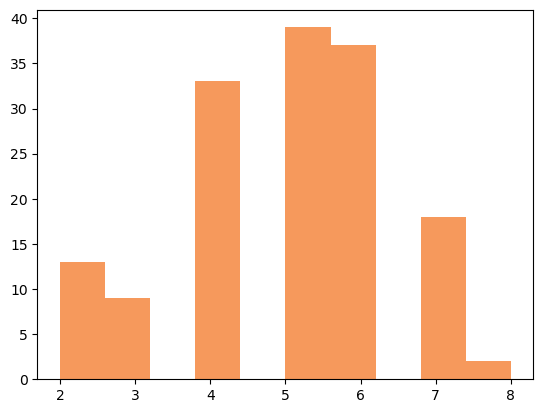

In [55]:
standard = df_group_mode.get_group("Standard Processing")
standard_notnull = standard.dropna()
standard_notnull.insert(4, "days_between_dates", (standard_notnull["ready_to_ship_date"] - standard_notnull["order_date"]).dt.days)
standard_notnull

# histogram with only the data that was provided to us
standard_notnull_plt = plt.hist(standard_notnull["days_between_dates"], color='#F6995C')

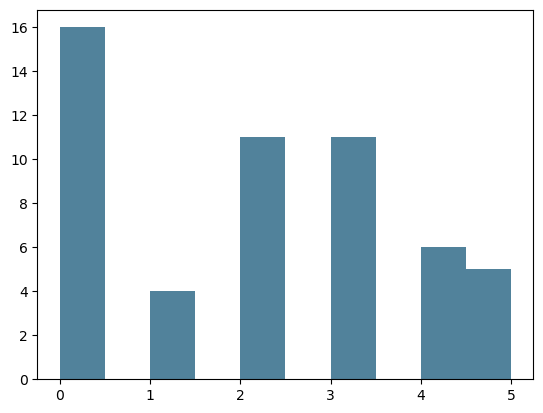

In [57]:
express = df_group_mode.get_group("Express")

express_notnull = express.dropna()
express_notnull.insert(4, "days_between_dates", (express_notnull["ready_to_ship_date"] - express_notnull["order_date"]).dt.days)

# histogram with only the data that was provided to us
express_notnull_plt = plt.hist(express_notnull["days_between_dates"], color='#51829B')

(array([16.,  0.,  4.,  0., 11.,  0., 11.,  0.,  6.,  5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

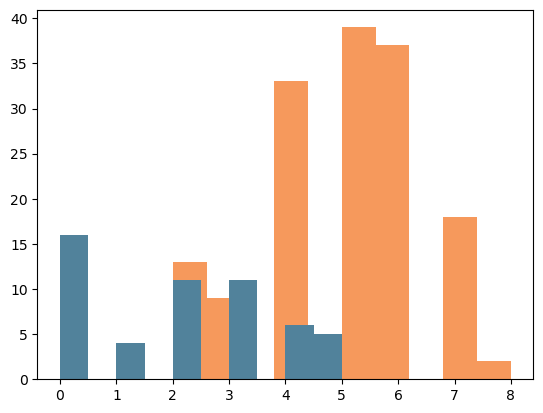

In [61]:
plt.hist(standard_notnull["days_between_dates"], color='#F6995C')
plt.hist(express_notnull["days_between_dates"], color='#51829B')


/var/folders/5g/31htd3cs1cjd_gg__zpcdhmc0000gn/T/ipykernel_57622/1245485468.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  standard_with_mean['ready_to_ship_date'].fillna(pd.to_datetime(standard_with_mean['order_date']) + pd.DateOffset(days=mean), inplace=True)


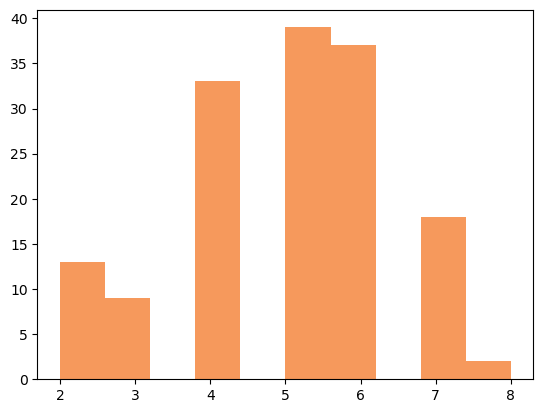

In [62]:

mean = standard_notnull["days_between_dates"].mean().round()

standard_with_mean = standard.copy()
standard_with_mean['ready_to_ship_date'].fillna(pd.to_datetime(standard_with_mean['order_date']) + pd.DateOffset(days=mean), inplace=True)
standard_with_mean.insert(4, "days_between_dates", (standard_with_mean["ready_to_ship_date"] - standard_with_mean["order_date"]).dt.days)
standard_with_mean

# histogram with the data that was insert with adding the mean to the order_date
standard_with_mean_plt = plt.hist(standard_notnull["days_between_dates"], color='#F6995C')

/var/folders/5g/31htd3cs1cjd_gg__zpcdhmc0000gn/T/ipykernel_57622/2266745808.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  express_with_mean['ready_to_ship_date'].fillna(pd.to_datetime(express_with_mean['order_date']) + pd.DateOffset(days=mean), inplace=True)


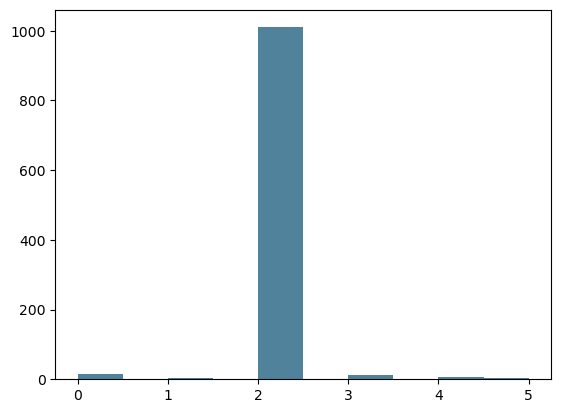

In [63]:
mean = express_notnull["days_between_dates"].mean().round()

express_with_mean = express.copy()
express_with_mean['ready_to_ship_date'].fillna(pd.to_datetime(express_with_mean['order_date']) + pd.DateOffset(days=mean), inplace=True)
express_with_mean.insert(4, "days_between_dates", (express_with_mean["ready_to_ship_date"] - express_with_mean["order_date"]).dt.days)
express_with_mean

# histogram with the data that was insert with adding the mean to the order_date
express_with_mean_plt = plt.hist(express_with_mean["days_between_dates"], color='#51829B')


(array([  16.,    0.,    4.,    0., 1010.,    0.,   11.,    0.,    6.,
           5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

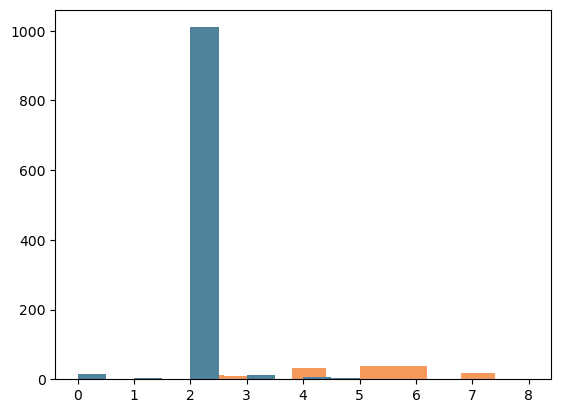

In [64]:
plt.hist(standard_notnull["days_between_dates"], color='#F6995C')
plt.hist(express_with_mean["days_between_dates"], color='#51829B')

In [ ]:
%stored standard_notnull_plt
%store standard_with_mean_plt
%store express_notnull_plt
%store express_with_mean_plt